In [1]:
%matplotlib inline
from lib import luminance
from lib import load
from pims import ImageSequence

In [13]:
import numpy as np

In [14]:
import matplotlib.pyplot as plt

### Create an image sequence from the video file

Image data was published as datas set at the VHub platform. Videos of each run are published as separate dataset.
  - pr06: https://vhub.org/resources/4211
  - pr05: TODO
  - ir16: TODO
  - ...

In [2]:
load.show()

run   cam   
---   ---   
pr06  casio-f1  
pr06  rx100v  
pr06  pco  



In [3]:
seq = load.imgseq('pr06', 'casio-f1')

Frame([[ 84, 107, 133, ...,  81,  96,  95],
       [ 91, 112, 106, ...,  56,  61,  66],
       [118, 111,  82, ...,  70,  65,  70],
       ..., 
       [109, 108, 139, ...,   4,  11,  25],
       [117,  96,  78, ...,   0,  15,  38],
       [118, 100,  71, ...,   0,  13,  35]], dtype=uint8)
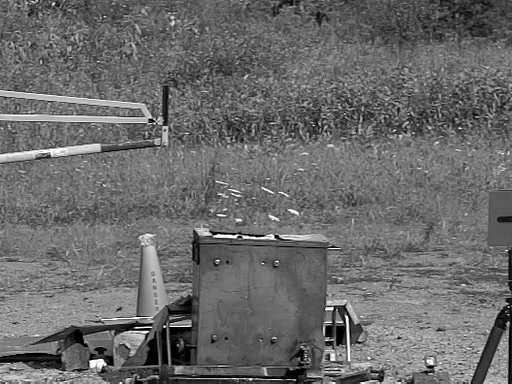

In [4]:
seq[0]

**spatial resolution:**  
Width of container top is 51 cm in real space, 129 px on image frame.

In [5]:
res = .51 / 129

**Melt brightness:**  
That should be measured from a typical melt 'domain' that shows no sign of motion blur. The measurement tool of ImageJ is the quickes way to do that.

In [6]:
bmelt = 175.

**Selection:**  
To improve the signal to noise ratio, only  $L$ can be computed from a subset of the frame. The format is `((vertical start, vertical end), (horizontal start, horizontal end))`

**Field of view:**  

In [8]:
H, W = seq[0].shape
Sc = res ** 2 * W * H
Sc

3.0729968631692817

Cumulative melt brightness

In [10]:
Bmelt = W * H * bmelt

**Background noise:**  
Take all frames before start of water injection to compute the average brightness of that interval. This is the beckground noise. In this video injection starts at frame 94, when the sync light turns on.

In [11]:
B0 = luminance.average_cbright(seq[:94])

**Luminanace:**

In [12]:
L = luminance.luminance_sequence(seq, Sc, Bmelt, B0)

**Time axis:**  
A time array that is 0 at water injection start, with time steps matching those of the video frame rate.

In [16]:
fps = 300
t = np.linspace(-94 / fps, (len(L) - 94) / fps, len(L))

Plot result

/usr/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


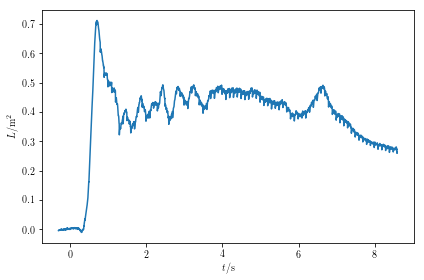

In [19]:
plt.plot(t, L)
plt.xlabel(r'$t/\mathrm{s}$')
plt.ylabel(r'$L/\mathrm{m^2}$');